As with the titanic notebook, this notebook will also function as a report alongside our completed work. This notebook will also consist of 3 parts similar to the titanic notebook

The EDA:

As always, let's begin by installing/importing all the libraries we are going to be using.

In [247]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

We will be loading data from an Excel file we renamed to "crops.xlsx" for ease of use, loading the data will be done using the Pandas library. We specify the sheet name as "CropStats" to read data from that specific sheet, as we felt like it held all the useful data. After loading the data, we display the first 10 rows of the DataFrame to get an initial look at the dataset, which allows us to quickly examine the structure and content of the dataset. It's essential for understanding the data before performing further analysis or preprocessing.

In [248]:
#loading the crop dataset
df = pd.read_excel("../files/crops.xlsx", sheet_name="CropStats")

#reading and displaying the first 10 rows
print("First 10 rows:")
df.head(10)


First 10 rows:


,Unnamed: 0,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2,notes
0,0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.310000,NaN,NaN
1,1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.470000,NaN,NaN
2,2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.270000,NaN,NaN
3,3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.330000,NaN,NaN
4,4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.280000,NaN,NaN
5,5,1907,Austria,NaN,wheat,NaN,NaN,1907,1.370000,NaN,NaN
6,6,1908,Austria,NaN,wheat,NaN,NaN,1908,1.360000,NaN,NaN
7,7,1909,Austria,NaN,wheat,NaN,NaN,1909,1.350000,NaN,NaN
8,8,1910,Austria,NaN,wheat,NaN,NaN,1910,1.180000,NaN,NaN
9,9,1911,Austria,NaN,wheat,NaN,NaN,1911,1.370000,NaN,NaN


Now, we are reading and displaying the last 10 rows of the DataFrame loaded from the "crops.xlsx" Excel file, specifically from the "CropStats" sheet.

This action provides insight into the end of the dataset, helping to ensure that we have a complete view of the data. Examining the last rows can be useful to check for any patterns or any deformities in the shape of our dataframe that might not be evident when looking at only the first rows.

Now let's check the details of our dataframe to see what we are working with.

In [249]:
#check the columns and their dataypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36707 non-null  int64  
 1   Harvest_year         36707 non-null  int64  
 2   admin0               36707 non-null  object 
 3   admin1               33716 non-null  object 
 4   crop                 36707 non-null  object 
 5   hectares (ha)        35084 non-null  float64
 6   production (tonnes)  34709 non-null  float64
 7   year                 36707 non-null  int64  
 8   yield(tonnes/ha)     34694 non-null  float64
 9   admin2               0 non-null      float64
 10  notes                5641 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.1+ MB


It seems we have an admin2 column which is completely empty, also we have tons of missing values in the notes column as well. So let's drop the admin2 column and look at the notes column a bit more in detail to see if we can find anything useful in there. Also according to the docoumentation, the harvest_year and year columns are not the same. For the sake of this project, we will only use the harvest_year feature as that will actually be related to any insights we want to make, the year feature only pertains to the year in which the data was reported.

In [250]:
#dropping columns admin2 year and Unnamed: 0 because they are not needed 
df = df.drop('admin2', axis=1)
df = df.drop('year', axis=1)
df = df.drop('Unnamed: 0', axis=1)


#renaming columns to make it easier for us
df.rename(columns={
    'admin0' : 'country',
    'admin1' : 'country_region',
    'Harvest_year' : 'year',
    'yield(tonnes/ha)' : 'yield',
    'hectares (ha)' : 'hectares',
    'production (tonnes)' : 'production'}, inplace=True)

df.head()

,year,country,country_region,crop,hectares,production,yield,notes
0,1902,Austria,NaN,wheat,NaN,NaN,1.310000,NaN
1,1903,Austria,NaN,wheat,NaN,NaN,1.470000,NaN
2,1904,Austria,NaN,wheat,NaN,NaN,1.270000,NaN
3,1905,Austria,NaN,wheat,NaN,NaN,1.330000,NaN
4,1906,Austria,NaN,wheat,NaN,NaN,1.280000,NaN


Now let's also take a closer look into the notes column to see if there is any relevant information for us there.

In [251]:
df['notes'].value_counts()

INSEE code 52                                                         238
INSEE code 11                                                         238
INSEE code 93                                                         238
INSEE code 91                                                         238
INSEE code 83                                                         238
INSEE code 82                                                         238
INSEE code 74                                                         238
INSEE code 73                                                         238
INSEE code 72                                                         238
INSEE code 54                                                         238
INSEE code 53                                                         238
INSEE code 43                                                         238
INSEE code 42                                                         238
INSEE code 41                         

It seems that the notes column has information in regards to the 'country region' column we have renamed. Let's check the country_region column and notes columns together to see if there are any missing values in the region column we could fill in with the notes.

In [252]:
for index, row in df.iterrows():
    country_region = row['country_region']
    notes = row['notes']
    
    if pd.isna(country_region) and not pd.isna(notes):
        print(f"Row {index}: 'country_region' is NaN, but 'notes' is not NaN.")

Row 5532: 'country_region' is NaN, but 'notes' is not NaN.
Row 5533: 'country_region' is NaN, but 'notes' is not NaN.
Row 5534: 'country_region' is NaN, but 'notes' is not NaN.
Row 5535: 'country_region' is NaN, but 'notes' is not NaN.
Row 5536: 'country_region' is NaN, but 'notes' is not NaN.
Row 5537: 'country_region' is NaN, but 'notes' is not NaN.
Row 5538: 'country_region' is NaN, but 'notes' is not NaN.
Row 5539: 'country_region' is NaN, but 'notes' is not NaN.
Row 5540: 'country_region' is NaN, but 'notes' is not NaN.
Row 5541: 'country_region' is NaN, but 'notes' is not NaN.
Row 5542: 'country_region' is NaN, but 'notes' is not NaN.
Row 5543: 'country_region' is NaN, but 'notes' is not NaN.
Row 5544: 'country_region' is NaN, but 'notes' is not NaN.
Row 5545: 'country_region' is NaN, but 'notes' is not NaN.
Row 5546: 'country_region' is NaN, but 'notes' is not NaN.
Row 5547: 'country_region' is NaN, but 'notes' is not NaN.
Row 5548: 'country_region' is NaN, but 'notes' is not Na

After looking at the spreadsheet manually as well, we have decided that the notes column is not worth using for our predictions/forecasts.

In [253]:
df = df.drop('notes', axis=1)


Now let's handle the missing values in our data. Let's just get a quick overview about how much of what information we are missing out on.

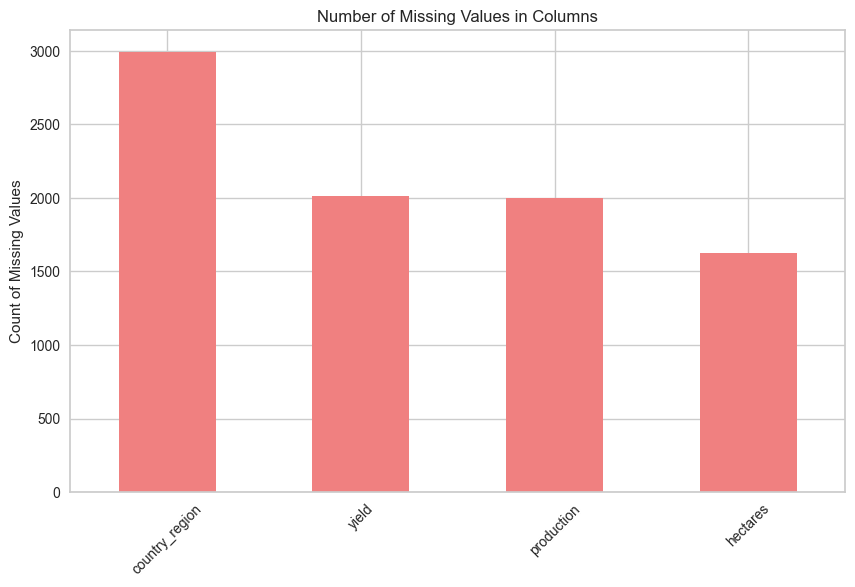

In [254]:

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

# Create a bar chart for columns with missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='lightcoral')
plt.title("Number of Missing Values in Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()


Honestly, we could just drop every row with missing values and our dataset would probably not suffer too much as we have so many rows. Regardless, let's not do that and instead let's figure out a way in which we can handle these in the most logical way possible.

First off let's begin with country_region, we've decided the best way to handle this is just to assign unspecified country_region's the value of unspecified.

In [255]:
df['country_region'].fillna("Not specified", inplace=True)

Also let's drop every row where all three of these columns are blank, as we have no reliable way of making predictions if they have no information at all.

In [256]:
df = df.dropna(subset=['production', 'yield', 'hectares'], how='all')


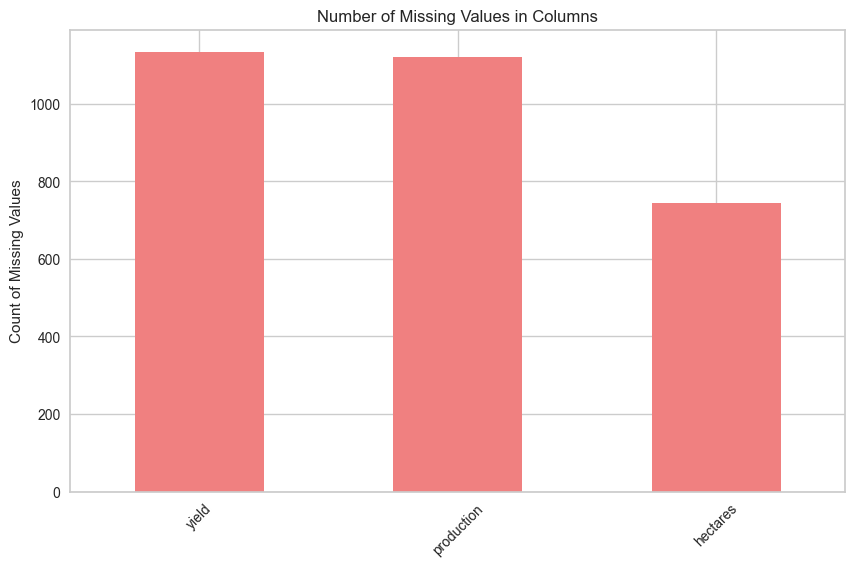

In [257]:

# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

# Create a bar chart for columns with missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='lightcoral')
plt.title("Number of Missing Values in Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()


Now we need to decide how to fill in the values for the remaining 3 columns. These columns are all kind of related to each other so we should take this into account as well (production = yield * hectares).

Let's see if we can decide which of these columns would be the easiest to average out. To do this, we can check for the column with the lowest coefficient of variation.

In [258]:
# Create a list to store DataFrames for each column
result_dfs = []

# Loop through unique countries
for country in df['country'].unique():
    # Filter the DataFrame for the specific country
    country_df = df[df['country'] == country]
    
    # Calculate the coefficient of variation for each column
    cv_production = (country_df['production'].std() / country_df['production'].mean()) * 100
    cv_yield = (country_df['yield'].std() / country_df['yield'].mean()) * 100
    cv_hectares = (country_df['hectares'].std() / country_df['hectares'].mean()) * 100
    
    # Create DataFrames for each column and store in the list
    result_dfs.append(pd.DataFrame({'column': ['production'], 'coefficient_of_variation': [cv_production]}))
    result_dfs.append(pd.DataFrame({'column': ['yield'], 'coefficient_of_variation': [cv_yield]}))
    result_dfs.append(pd.DataFrame({'column': ['hectares'], 'coefficient_of_variation': [cv_hectares]}))

# Concatenate the DataFrames in the list into a single result DataFrame
result_df = pd.concat(result_dfs, ignore_index=True)

# Find the column with the smallest coefficient of variation
min_cv_column = result_df.loc[result_df['coefficient_of_variation'].idxmin()]

# Display the result
print("Column with the smallest coefficient of variation:")
print(min_cv_column)


Column with the smallest coefficient of variation:
column                      hectares
coefficient_of_variation    5.865151
Name: 5, dtype: object


It seems that the hectares column has the smallest coefficient of variation. Which makes sense when we think about it as you cannot 'grow' more land. The land a country has is finite and not expandable (at least not like before). So let's fill in the missing values for hectares by grabbing the average of the countries.

In [259]:
def fill_average_hectares(row):
    year = row['year']
    country = row['country']
    # left out part of the condition because some countries did not have data for it
    condition = (df['country'] == country) # & (df['year'] < 1940 if year < 1940 else df['year'] >= 1940)
    average_ha = df.loc[condition, 'hectares'].mean()
    return average_ha

# Fill missing values in 'hectares' based on the calculated averages
df['hectares'] = df.apply(lambda row: fill_average_hectares(row) if pd.isna(row['hectares']) else row['hectares'], axis=1)


Now that we have the hectares column filled out for each row, we can move on to handling the production and yield columns. Let's visualize these fields to get an idea of how we can do this.

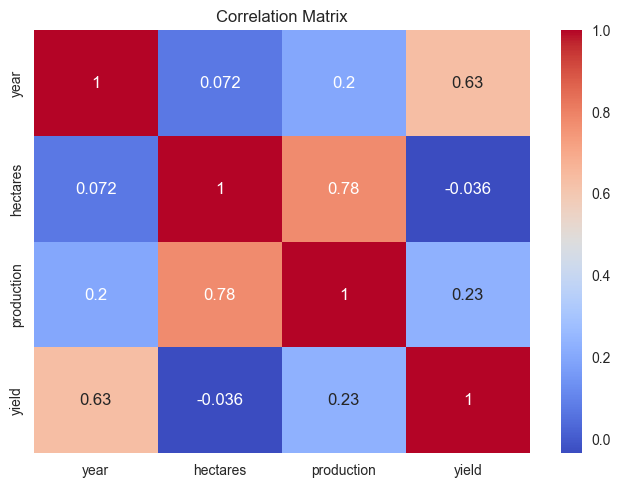

In [260]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

as it seems that production and hectares have a high correlation, let's use the hectares column to assist in filling in missing values for our production column. To do this, let's use a linear regression model and use that model to make predictions on the production column. Then we can fill in the missing values using our predictions.

In [261]:
df2 = df.dropna(subset=['production'])

X = df2[['hectares']]
y = df2[['production']]

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)

In [262]:
missing_data = df[df['production'].isnull()]
predictions = model.predict(missing_data[['hectares']])

# Fill in missing data with predictions
df.loc[df['production'].isnull(), 'production'] = predictions

In [263]:
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
# plt.title("Correlation Matrix")
# plt.show()

And finally, let's handle the missing values in the yield column by just calculating the yield based on the hectares and production columns.

In [264]:
def fill_missing_yield(row):
    yield_per_ha = row['yield']
    if pd.isna(yield_per_ha):
        hectares = row['hectares']
        production = row['production']
        if production == 0:
            return 0
        if pd.notna(hectares) and pd.notna(production):
            return hectares / production
    return yield_per_ha

# Apply the function to fill missing values in 'yield'
df['yield'] = df.apply(fill_missing_yield, axis=1)

In [265]:
df.isna().any()

year              False
country           False
country_region    False
crop              False
hectares          False
production        False
yield             False
dtype: bool

Now that our data is cleaned up a bit, let's take a closer look into it and see what interesting things we can pick up.

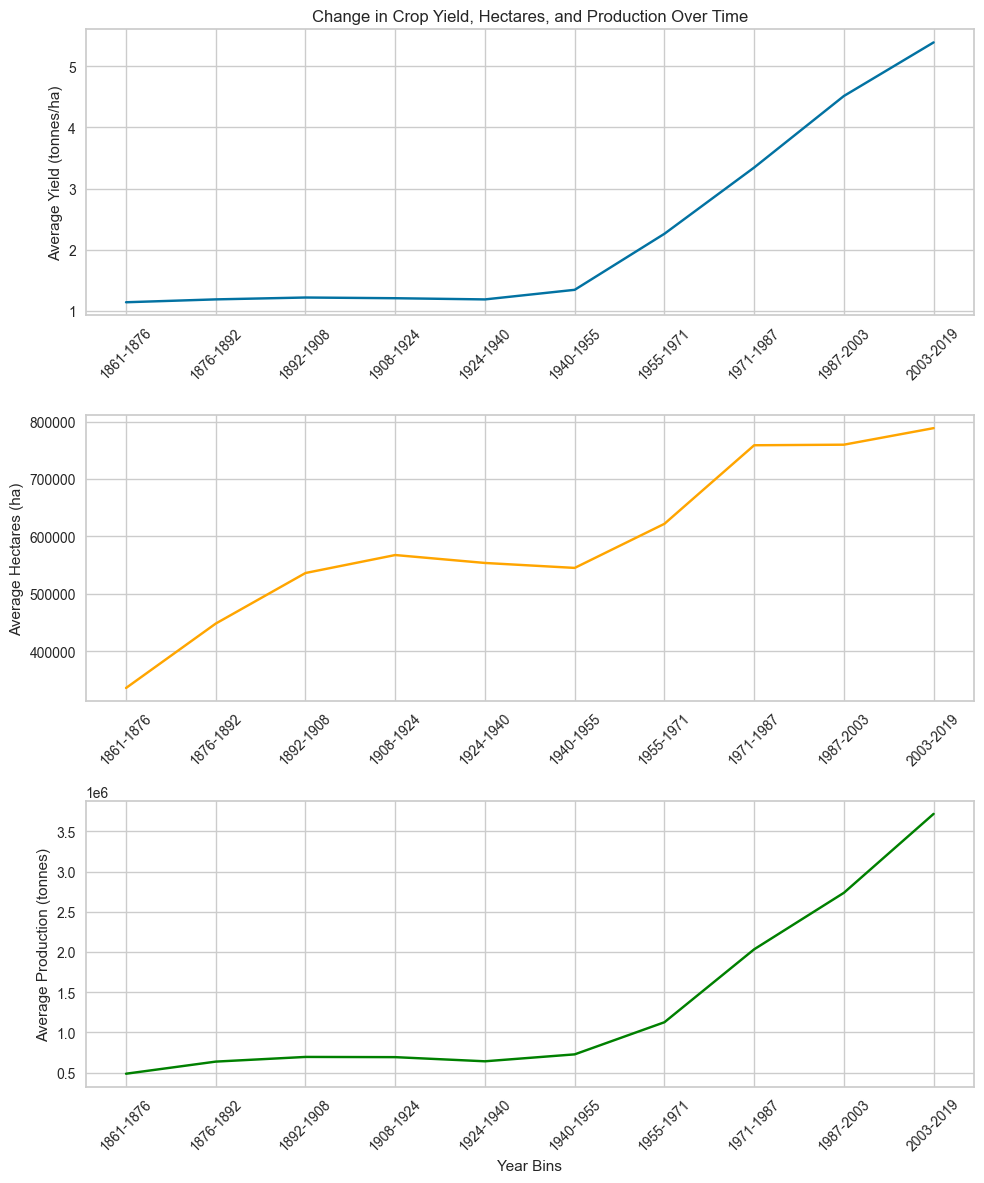

In [266]:
# Determine the minimum and maximum years for binning
min_year = df['year'].min()
max_year = df['year'].max()

# Create 10 equal bins with rounded edges
num_bins = 10
bin_width = (max_year - min_year) / num_bins
bin_edges = [min_year + i * bin_width for i in range(num_bins + 1)]

# Create the 'year_bin' column with binned values
df['year_bin'] = pd.cut(df['year'], bins=bin_edges, include_lowest=True, right=False)

# Group data by 'year_bin' and calculate the mean yield, mean hectares, and mean production for each bin
binned_yield = df.groupby('year_bin')['yield'].mean()
binned_hectares = df.groupby('year_bin')['hectares'].mean()
binned_production = df.groupby('year_bin')['production'].mean()

# Convert the 'year_bin' labels to strings
bin_labels = [f"{int(b.left)}-{int(b.right)}" for b in binned_yield.index]

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot the binned yield data on the first subplot
ax1.plot(bin_labels, binned_yield.values)
ax1.set_ylabel('Average Yield (tonnes/ha)')
ax1.set_title('Change in Crop Yield, Hectares, and Production Over Time')

# Plot the binned hectares data on the second subplot
ax2.plot(bin_labels, binned_hectares.values, color='orange')
ax2.set_ylabel('Average Hectares (ha)')

# Plot the binned production data on the third subplot
ax3.plot(bin_labels, binned_production.values, color='green')
ax3.set_xlabel('Year Bins')
ax3.set_ylabel('Average Production (tonnes)')

# Rotate x-axis labels for readability in all subplots
ax1.set_xticklabels(bin_labels, rotation=45)
ax2.set_xticklabels(bin_labels, rotation=45)
ax3.set_xticklabels(bin_labels, rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

df.drop('year_bin', axis=1, inplace=True)

It seems that the hectares didn't really have an effect on the yield, in this case we can call yield something along the lines of efficiency as it would refer to the amount of production made in the same sized area. So it seems that around the end of the 1940's is when the farmers began utilizing different methods and technologies to improve their yield. Let's see which countries benefited the most from this.

In [267]:
# Filter data before and after 1940
df_before_1940 = df[df['year'] < 1940]
df_after_1940 = df[df['year'] >= 1940]

# Calculate the average yield for each country before and after 1940
average_yield_before_1940 = df_before_1940.groupby('country')['yield'].mean()
average_yield_after_1940 = df_after_1940.groupby('country')['yield'].mean()

# Get the top 5 countries with the highest average yield before and after 1940
top_5_before_1940 = average_yield_before_1940.nlargest(5)
top_5_after_1940 = average_yield_after_1940.nlargest(5)

# Print the results
print("Top 5 countries with the highest average yield per hectare before 1940:")
print(top_5_before_1940)

print("\nTop 5 countries with the highest average yield per hectare after 1940:")
print(top_5_after_1940)

Top 5 countries with the highest average yield per hectare before 1940:
country
Belgium          2.513667
United Kingdom   2.354909
Canada           1.964231
Sweden           1.878030
Netherlands      1.824736
Name: yield, dtype: float64

Top 5 countries with the highest average yield per hectare after 1940:
country
Belgium          5.872049
United Kingdom   5.499650
Netherlands      5.456331
France           4.845740
Chile            4.059439
Name: yield, dtype: float64


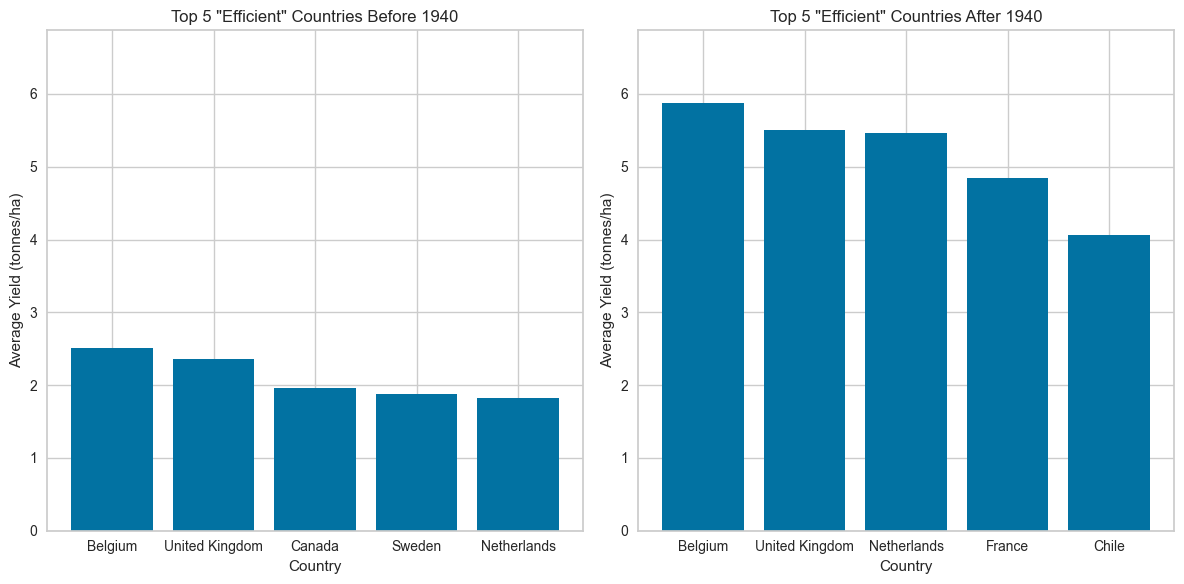

In [268]:
max_value = max(top_5_before_1940.max(), top_5_after_1940.max())

# Create bar charts to visualize the data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(top_5_before_1940.index, top_5_before_1940)
plt.xlabel('Country')
plt.ylabel('Average Yield (tonnes/ha)')
plt.title('Top 5 "Efficient" Countries Before 1940')
plt.ylim(0, max_value + 1)  


plt.subplot(1, 2, 2)
plt.bar(top_5_after_1940.index, top_5_after_1940)
plt.xlabel('Country')
plt.ylabel('Average Yield (tonnes/ha)')
plt.title('Top 5 "Efficient" Countries After 1940')
plt.ylim(0, max_value + 1)  

plt
plt.tight_layout()
plt.show()

Let's take a look at which country had the highes amount of production per year.

In [269]:
#country with the highest yield per year, hover for more info
# Group data by 'year' and find the country with the highest yield in each year
highest_production_per_year = df.groupby('year').apply(lambda x: x.loc[x['production'].idxmax()]).reset_index(drop=True)

# Create an interactive scatter plot with hover labels
fig = px.scatter(highest_production_per_year, x='year', y='yield', color='country', hover_name='country', labels={'country': 'Country'})
fig.update_layout(
    title='Interactive Scatter Plot of Production Over Time',
    xaxis_title='Year',
    yaxis_title='production',
)

fig.show()

Now lets encode the country, country_region and crop type using one hot encoding. We will have to do the encoding since we have a regression problem.

In [270]:

# Create a copy of the original DataFrame
df_encoded = df.copy()

# Perform one-hot encoding for 'country', 'country_region', and 'crop' columns
df_encoded = pd.get_dummies(df_encoded, columns=['country', 'country_region', 'crop'])


Lets split the dataset into test and train sets for the models we will be training. 

In [271]:
feature_cols = df_encoded.columns.to_list()
feature_cols.remove('production')

#These are the feature columns
X = df_encoded[feature_cols]

#This is the column which we will be predicting
y = df_encoded['production']
print(feature_cols)

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

['year', 'hectares', 'yield', 'country_Argentina', 'country_Australia', 'country_Austria', 'country_Belgium', 'country_Brazil', 'country_Canada', 'country_Chile', 'country_China', 'country_Croatia', 'country_Czech Republic', 'country_Finland', 'country_France', 'country_India', 'country_Indonesia', 'country_Italy', 'country_Mexico', 'country_Morocco', 'country_Netherlands', 'country_Portugal', 'country_South Africa', 'country_Spain', 'country_Sweden', 'country_United Kingdom', 'country_United States', 'country_Uruguay', 'country_region_ALABAMA', 'country_region_ARIZONA', 'country_region_ARKANSAS', 'country_region_Aquitaine', 'country_region_Australian Capital Territory', 'country_region_Auvergne', 'country_region_Brittany', 'country_region_Burgundy', 'country_region_CALIFORNIA', 'country_region_COLORADO', 'country_region_CONNECTICUT', 'country_region_Campania', 'country_region_Centre-Val de Loire', 'country_region_Champagne-Ardenne', 'country_region_DELAWARE', 'country_region_Emilia-Ro

In [272]:
y_train

33707    180000.000000
35800   5260000.000000
29182    281406.488134
1798     110900.000000
22160   2323079.658606
             ...      
6413      95252.400000
8965       4614.000000
17833     84040.931853
24422    172729.120098
35248     30000.000000
Name: production, Length: 28663, dtype: float64

Let's first try training a Random Forest Regressor model. We chose this model because the problem we are facing is a regression problem and not a classification problem

In [273]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit a RandomForestRegressor model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

# Make predictions on the test dataset
rfr_y_pred = rfr_model.predict(X_test)

Now let's check how our model is performing.

In [274]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
# Calculate the R-squared (R2) score
rfr_r2 = r2_score(y_test, rfr_y_pred)

#Calculate the roost mean squared error
rfr_mse = mean_squared_error(y_test, rfr_y_pred)
rfr_rmse = math.sqrt(rfr_mse)

# Print the R2 score
print(f"R-squared (R2) score for random forest regressor model: {rfr_r2}")
print(f"Root mean squared error for random forest regressor model: {rfr_rmse}")

R-squared (R2) score for random forest regressor model: 0.9983899780445256
Root mean squared error for random forest regressor model: 188645.2603348331


Seeing that our R2 score is close to 1 we can assume that the model is going to make rather good predictions.

In [275]:
rfr_production_predictions = pd.DataFrame({'Actual Production': y_test, 'Predicted Production': rfr_y_pred})

# Display the DataFrame
print(rfr_production_predictions)

       Actual Production  Predicted Production
15873      276507.729153         277566.669279
19792     3032158.097948        2966783.479359
16466     1029827.999129        1034276.529928
12575     7783583.714348        7529023.483807
20402        1270.067060           1272.961303
...                  ...                   ...
14627     1712279.555846        1698731.489574
22156        5588.295062           5596.342152
19811       29719.569193          30458.571523
20222     4200213.371266        4220110.921957
14540     2642390.594383        2612382.169062

[7166 rows x 2 columns]


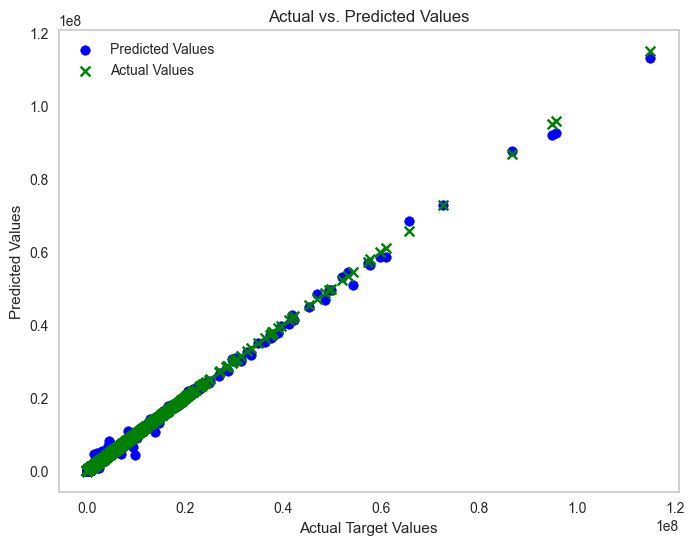

In [276]:
# Create a scatter plot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rfr_y_pred, color='blue', marker='o', label='Predicted Values')

plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid()

# Plot actual values in a different color
plt.scatter(y_test, y_test, color='green', marker='x', label='Actual Values')

# Add a legend to the plot
plt.legend()

plt.show()

As you can see in the scatter plot above, the predictions the model made are extremely close to their corresponding true values.

But now let's try using pycaret and let's see which model it thinks is the best to use.

In [277]:
from pycaret.regression import *
pyc = setup(data = df, target = 'production')
best_model = compare_models()
evaluate_model(best_model)

,Description,Value
0,Session id,3529
1,Target,production
2,Target type,Regression
3,Original data shape,"(35829, 7)"
4,Transformed data shape,"(35829, 35)"
5,Transformed train set shape,"(25080, 35)"
6,Transformed test set shape,"(10749, 35)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,28155.3394,52372077142.5373,202595.2807,0.9978,0.4775,0.0181,0.9710
rf,Random Forest Regressor,43518.5145,110961315850.8012,320774.8434,0.9953,0.4045,0.0213,1.3940
dt,Decision Tree Regressor,76609.2754,267129198872.6864,498312.4634,0.9888,0.2817,0.0407,0.0590
gbr,Gradient Boosting Regressor,183952.4935,272479622880.3300,517073.4161,0.9882,2.3158,15.6038,0.3930
lightgbm,Light Gradient Boosting Machine,95992.2392,347150354136.9316,558854.3777,0.9851,1.5938,3.2324,0.1150
knn,K Neighbors Regressor,594138.2312,3020253193830.3999,1733253.7875,0.8700,0.8738,0.6057,0.0850
ada,AdaBoost Regressor,2090175.2936,6026131215795.8193,2448071.1101,0.7358,4.0001,708.4964,0.5390
lasso,Lasso Regression,1188753.8896,6633576590706.8721,2565931.6602,0.7174,3.4424,274.7162,0.5550
ridge,Ridge Regression,1187923.9895,6633586320432.2559,2565906.1139,0.7174,3.4429,275.0091,0.0500
lr,Linear Regression,1188760.3712,6633576617099.5479,2565931.8154,0.7174,3.4423,274.7141,0.1910


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Pycaret concludes that the Extra Trees Regressor model is the best model for this situation. It beat our selected models R2 score by 0.002%.